In [1]:
import pandas as pd
import numpy as np

In [2]:
def erreur(x, w, y):
  y_model = model(x, w)

  distance = (y - y_model) **2

  return np.sum(distance)

In [3]:
#  Nouvelle erreur
def erreur(X, W, Y, B):
    
    M = np.dot(X, W)  
    P = M + B
    L = np.mean((Y - P) **2)
    
    return L
    

In [4]:
X = np.array([
    [2, 3, -2],
    [4, 5, -1],
    [-5, 2, 3],
    [0, 5, 4]
])

In [5]:
Y = np.array([
    [2],
    [5],
    [6],
    [3]
])

In [6]:
Y.shape

(4, 1)

In [7]:
W = np.array([
    [0.02],
    [18],
    [15]
])

In [8]:
W.shape

(3, 1)

In [9]:
B = 0.5

In [10]:
erreur(X, W , Y, B)

8232.7495

In [11]:
params = {"W": W, "B": B}

In [12]:
#  Nouvelle erreur
def erreur(X, Y, para):
    
    info = {}
    
    M = np.dot(X, para["W"]) 
    info["M"] = M
    
    P = M + para["B"]
    info["P"] = P
    
    L = np.mean((Y - P) **2)
    
    info["X"] = X
    info["Y"] = Y
    
    return L, info
    

In [13]:
loss, info = erreur(X, Y, params)

In [14]:
loss

8232.7495

In [15]:
info

{'M': array([[ 24.04],
        [ 75.08],
        [ 80.9 ],
        [150.  ]]),
 'P': array([[ 24.54],
        [ 75.58],
        [ 81.4 ],
        [150.5 ]]),
 'X': array([[ 2,  3, -2],
        [ 4,  5, -1],
        [-5,  2,  3],
        [ 0,  5,  4]]),
 'Y': array([[2],
        [5],
        [6],
        [3]])}

In [ ]:
#  Juste pour voir et comparer avec gradient
def erreur(X, Y, para):
    
    info = {}
    
    M = np.dot(X, para["W"]) 
    info["M"] = M
    
    P = M + para["B"]
    info["P"] = P
    
    L = np.mean((Y - P) **2)
    
    info["X"] = X
    info["Y"] = Y
    
    return L, info
    

In [16]:
def gradient(info, params):  # La fonction gradient sert à identifier dans quel sens(réduire ou augmenter) trouver le bon le poids W et le Biais B
    #  Application de la regle Chain Rule (la dérivé d'une fonction composée est la dérivée successive des fonctions qui la composent)
    grads = {}
    
    dL_dP = -2 * (info['Y'] - info['P'])  # (4,1)
    dP_dM = 1  #  (1,)
    dM_dW = info['X'].T  #  (3,4)
    
    dL_dW = np.dot(dM_dW, dL_dP) * dP_dM
    grads['W'] = dL_dW
    
    dP_dB = 1
    
    dL_dB = dL_dP * dP_dB  # (4, 1) * 1
    
    dL_dB = np.sum(dL_dB)
    grads['B'] = dL_dB
    
    return grads
        

In [17]:
grads = gradient(info, params)

In [18]:
params

{'W': array([[ 0.02],
        [18.  ],
        [15.  ]]),
 'B': 0.5}

In [19]:
grads

{'W': array([[ -99.2 ],
        [2617.64],
        [1401.08]]),
 'B': 632.04}

In [20]:
params['W'] = params['W'] - 0.01 * grads['W']
params['B'] = params['B'] - 0.01 * grads['B']


In [21]:
params

{'W': array([[ 1.012 ],
        [-8.1764],
        [ 0.9892]]),
 'B': -5.820399999999999}

In [22]:
new_loss, info = erreur(X, Y, params)
new_loss

1604.6036749200002

In [23]:
learning_rate = 0.01

for p in params:
    params[p] = params[p] - learning_rate * grads[p]

In [24]:
def train(X, Y, params, epoch, learning_rate):  # Entrainer notre modele sur plusieur epoch
    error = []
    for i in range(epoch):        
        # Forward
        loss, info = erreur(X, Y, params)
        error.append(loss)
        print(f'Epoch {i+1}......... loss : {loss}')
        
        # Backward
        grads = gradient(info, params)
        
        # Update        
        for p in params:
            params[p] = params[p] - learning_rate * grads[p]
            
    return params, error 

In [25]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [26]:
Y

array([[2],
       [5],
       [6],
       [3]])

In [32]:
params, error = train(X, Y, params, epoch=40, learning_rate=0.01)

Epoch 1......... loss : 1.073135838760768
Epoch 2......... loss : 1.0727209847479504
Epoch 3......... loss : 1.0723062911098455
Epoch 4......... loss : 1.0718917577844544
Epoch 5......... loss : 1.0714773847098058
Epoch 6......... loss : 1.0710631718239485
Epoch 7......... loss : 1.0706491190649565
Epoch 8......... loss : 1.070235226370927
Epoch 9......... loss : 1.0698214936799821
Epoch 10......... loss : 1.0694079209302694
Epoch 11......... loss : 1.0689945080599572
Epoch 12......... loss : 1.0685812550072395
Epoch 13......... loss : 1.068168161710334
Epoch 14......... loss : 1.0677552281074816
Epoch 15......... loss : 1.0673424541369474
Epoch 16......... loss : 1.0669298397370213
Epoch 17......... loss : 1.0665173848460152
Epoch 18......... loss : 1.0661050894022677
Epoch 19......... loss : 1.06569295334414
Epoch 20......... loss : 1.0652809766100126
Epoch 21......... loss : 1.0648691591382988
Epoch 22......... loss : 1.064457500867427
Epoch 23......... loss : 1.0640460017358557
Epo

In [33]:
import matplotlib.pyplot as plt

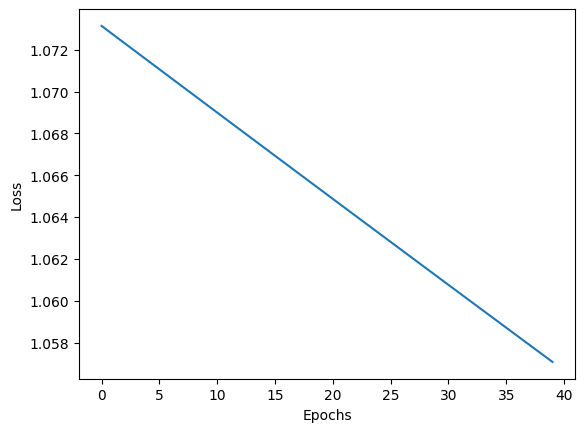

In [34]:
plt.plot(list(range(40)), error)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [38]:
def predict(X, params):
    
    M = np.dot(X, params['W'])  
    P = M + params['B']
    # L = np.mean((Y - P) **2)
    
    return P

In [39]:
prediction = predict(X, params)

In [40]:
prediction

array([[3.30068906],
       [3.69025168],
       [5.4659713 ],
       [3.73092084]])

In [41]:
Y

array([[2],
       [5],
       [6],
       [3]])